Импорт библиотек

In [251]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Анализ данных

In [252]:
dt = pd.read_html('/content/Выгрузка 9 апреля.xls')

In [253]:
df = dt[1]
df.head()

,№ п/п,№документа,Датарегистрации,Исх. №Дата,Адресат,Автор,Краткоесодержание,Примечание
0,1,WSR/1-838/2019,09.04.2019,208-40908.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...,NaN
1,2,WSR/1-837/2019,09.04.2019,05-33809.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...,NaN
2,3,WSR/1-835/2019,09.04.2019,И10-14/313709.04.2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....,NaN
3,4,WSR/1-834/2019,09.04.2019,Д2/7121-ИС03.04.2019,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...,NaN
4,5,WSR/1-833/2019,09.04.2019,15-20/06-91108.04.2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...,NaN


Информация

In [254]:
df.shape

(4967, 8)

In [255]:
df.info

<bound method DataFrame.info of       № п/п  ... Примечание
0         1  ...        NaN
1         2  ...        NaN
2         3  ...        NaN
3         4  ...        NaN
4         5  ...        NaN
...     ...  ...        ...
4962   4963  ...        NaN
4963   4964  ...        NaN
4964   4965  ...        NaN
4965   4966  ...        NaN
4966   4967  ...        NaN

[4967 rows x 8 columns]>

In [256]:
df.describe()

,№ п/п
count,4967.000000
mean,2484.000000
std,1433.993724
min,1.000000
25%,1242.500000
50%,2484.000000
75%,3725.500000
max,4967.000000


1.1 Предобработка данных и выделение значимых атрибутов

In [257]:
dt[0].T[0]
dt[0].T[1].unique().tolist()
dt[0].T[2].unique().tolist()
df = dt[1]

In [258]:
df = dt[1].drop(['№ п/п','№документа','Исх. №Дата', 'Примечание'],axis=1)
df.head(2)

,Датарегистрации,Адресат,Автор,Краткоесодержание
0,09.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...
1,09.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...


1.2 Разбиение сложных атрибутов

Импорт библиотек

In [259]:
import re

Удаляем пропущенные значеия, не трогая колонку Примечания

In [260]:
df = df.dropna(subset=['Датарегистрации'])

In [261]:
adres = []
c = 0
reg_fio = r'([А-Я]\.[А-Я]\.\s?[А-Я][а-я]{1,20}|[А-Я][а-я]{1,20}\s?[А-Я]\.[А-Я]\.)'
for i in df.Адресат:
  result = re.findall(reg_fio, i)[-1]
  adres.append(result.replace(' ',''))

df['Адресат(-ы)'] = adres
df.tail(2)

,Датарегистрации,Адресат,Автор,Краткоесодержание,Адресат(-ы)
4964,01.11.2017,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...,УразовР.Н.
4965,01.11.2017,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...,УразовР.Н.


1.3 Дополнение недостающими данными

In [262]:
df['Адресат(-ы)'].unique().shape

(81,)

Создаём доп. признаки на основе краткого содержания и даты регистрации, из которой мы можем взять месяц отправки

Переводим дату в datetime. Анализируем дату регистрации

In [263]:
df.Датарегистрации = pd.to_datetime(df.Датарегистрации)
df.Датарегистрации.describe()

count                    4965
unique                    372
top       2017-11-29 00:00:00
freq                       42
first     2017-01-11 00:00:00
last      2019-12-03 00:00:00
Name: Датарегистрации, dtype: object

In [264]:
df.head()

,Датарегистрации,Адресат,Автор,Краткоесодержание,Адресат(-ы)
0,2019-09-04,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...,УразовР.Н.
1,2019-09-04,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...,УразовР.Н.
2,2019-09-04,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....,УразовР.Н.
3,2019-09-04,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...,ИванюкЛ.А.
4,2019-09-04,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...,УразовР.Н.


1.5 Преобразование списков переадресаций

Вытаскиваем авторов

Вытаскиваем Авторов (от которых исходит письмо) 

In [265]:
df['Агентсво'] = df.Автор.apply(lambda x: x.split('(')[1].replace(')',''))

In [266]:
df.head(2)

,Датарегистрации,Адресат,Автор,Краткоесодержание,Адресат(-ы),Агентсво
0,2019-09-04,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...,УразовР.Н.,АО «Интерфакс»
1,2019-09-04,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...,УразовР.Н.,Министерство просвещения Российской Федерации


Переписать список откуда и куда, сравнить строки

In [267]:
agents = []
target = ['Министерств','Правительств','Федеральн','Администр']
for i in df.Агентсво:
  br = 0
  for t in target:
    if br:
      break
    if t in i:
      br = 1
      agents.append(1)
  if not(br):
    agents.append(0)

In [268]:
df['Тип_агентсва'] = agents

Анализируем форму составления кратного сожержания

In [269]:
dt[1]['№документа'].apply(lambda x: x.split('/')[0] if type (x) != float else 'NaN').unique()

array(['WSR', 'NaN'], dtype=object)

In [270]:
df.Краткоесодержание[4961]

'О заседании рабочей группы приоритетного проекта "Рабочие кадры для передовых технологий"'

In [271]:
dt[1]['№документа']

0         WSR/1-838/2019
1         WSR/1-837/2019
2         WSR/1-835/2019
3         WSR/1-834/2019
4         WSR/1-833/2019
              ...       
4962    WSR/1.-1749/2017
4963    WSR/1.-1751/2017
4964    WSR/1.-1748/2017
4965    WSR/1.-1747/2017
4966                 NaN
Name: №документа, Length: 4967, dtype: object

1.4 Формирование словарей данных

In [272]:
df.head

<bound method NDFrame.head of      Датарегистрации  ... Тип_агентсва
0         2019-09-04  ...            0
1         2019-09-04  ...            1
2         2019-09-04  ...            1
3         2019-09-04  ...            1
4         2019-09-04  ...            0
...              ...  ...          ...
4961      2017-01-11  ...            1
4962      2017-01-11  ...            1
4963      2017-01-11  ...            1
4964      2017-01-11  ...            1
4965      2017-01-11  ...            1

[4965 rows x 7 columns]>

In [273]:
top_five = df.Агентсво.value_counts()[:5]
bar_dict = {}
for i in top_five.reset_index().values:
    bar_dict[i[0]] = i[1]

In [274]:
bard = pd.DataFrame(bar_dict, index=["Количество писем"])

In [275]:
import pandas as pd
import matplotlib.pyplot as plt

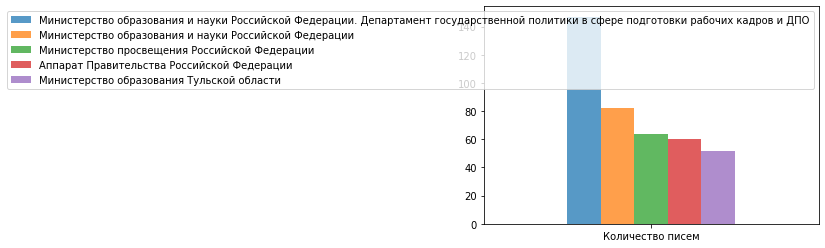

In [276]:
fig, ax = plt.subplots()
bard.plot(kind='bar',ax=ax, alpha=0.75, rot=0)

Облако слов

Устанвка библиотек

In [277]:
!pip install pymorphy2
!pip install pymorphy2-dicts-ru

In [278]:
!pip install wordcloud

Импорт библиотек

In [279]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [280]:
from collections import Counter
import collections
import pymorphy2
from nltk.corpus import stopwords
morph = pymorphy2.MorphAnalyzer()
stopwords_ru = stopwords.words('russian')

def normal_rus(w):
    res = morph.parse(w)
    for r in res:
        if 'NOUN' in r.tag:
            if r.normal_form not in stopwords_ru:
                return r.normal_form
            return None
        return None

from collections import Counter
c_dict = Counter()
for s in df.Краткоесодержание.values:
    for w in s.split():
        n = normal_rus(w)
        if n is not None:
            c_dict[n] += 1

In [281]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

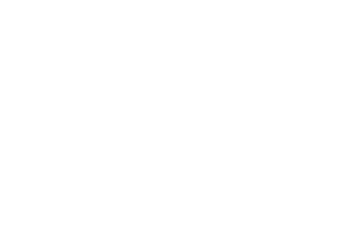

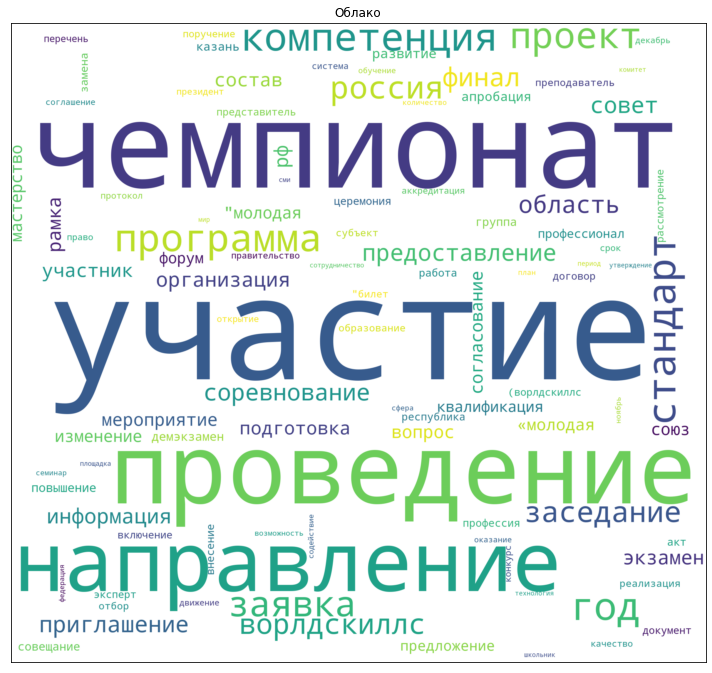

In [282]:
common = c_dict.most_common(100)
wc = WordCloud(width=2500, height=2300, background_color="white", relative_scaling=1.0, collocations=False, min_font_size=10).generate_from_frequencies(dict(common))
plt.axis("off")
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation="bilinear")
plt.title("Облако")
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()